In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# 1. 데이터 준비 (이전 코드와 동일)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [8]:
# 2. CNN 모델 만들기
model = keras.Sequential([
    # 입력 형태: (28, 28, 1)
    layers.Input(shape=(28, 28, 1)),

    # 첫 번째 합성곱 층
    # 32개의 3x3 필터(커널)를 사용하여 이미지의 특징(feature)을 추출합니다.
    # 'relu' 활성화 함수를 사용하여 비선형성을 추가합니다.
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),

    # 첫 번째 풀링 층
    # 2x2 크기의 풀링을 통해 이미지 크기를 절반으로 줄여(14x14) 계산량을 감소시킵니다.
    layers.MaxPooling2D(pool_size=(2, 2)),

    # 두 번째 합성곱 층
    # 64개의 필터로 더 복잡한 특징을 학습합니다.
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),

    # 두 번째 풀링 층
    # 이미지 크기를 다시 절반으로 줄입니다. (7x7)
    layers.MaxPooling2D(pool_size=(2, 2)),

    # 1차원으로 펼치기
    # 2D 형태의 특징 맵을 1D 벡터로 변환하여 완전 연결 계층에 입력할 수 있도록 합니다.
    layers.Flatten(),

    # 드롭아웃
    # 학습 중인 뉴런의 50%를 무작위로 비활성화하여 과적합(overfitting)을 방지합니다.
    #layers.Dropout(0.5),

    # 출력 층 (완전 연결 계층)
    # 10개의 뉴런(0~9 숫자 분류)을 사용하고, 'softmax' 활성화 함수로 각 숫자에 대한 확률을 계산합니다.
    layers.Dense(10, activation="softmax")
])

# 모델 구조 요약 출력
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# 3. 모델 컴파일
# 모델이 학습할 방법을 설정합니다.
model.compile(
    optimizer="adam",  # 옵티마이저: Adam (일반적으로 성능이 좋음)
    loss="sparse_categorical_crossentropy",  # 손실 함수: 다중 분류 문제에 사용
    metrics=["accuracy"]  # 평가 지표: 정확도
)

In [10]:
# 4. 모델 학습
# 학습 데이터로 모델을 훈련시킵니다.
# epochs: 전체 데이터를 몇 번 반복 학습할지 결정
# validation_split: 학습 데이터의 일부(20%)를 검증용으로 사용하여 매 epoch마다 성능을 확인
history = model.fit(
    x_train,
    y_train,
    epochs=5,
    validation_split=0.2
)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8812 - loss: 0.4033 - val_accuracy: 0.9783 - val_loss: 0.0715
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9803 - loss: 0.0625 - val_accuracy: 0.9827 - val_loss: 0.0540
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9856 - loss: 0.0444 - val_accuracy: 0.9855 - val_loss: 0.0463
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9894 - loss: 0.0313 - val_accuracy: 0.9865 - val_loss: 0.0450
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9920 - loss: 0.0257 - val_accuracy: 0.9883 - val_loss: 0.0401


In [11]:
# 5. 모델 평가
# 테스트 데이터로 최종 성능을 평가합니다.
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\n테스트 정확도: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9855 - loss: 0.0443

테스트 정확도: 0.9879


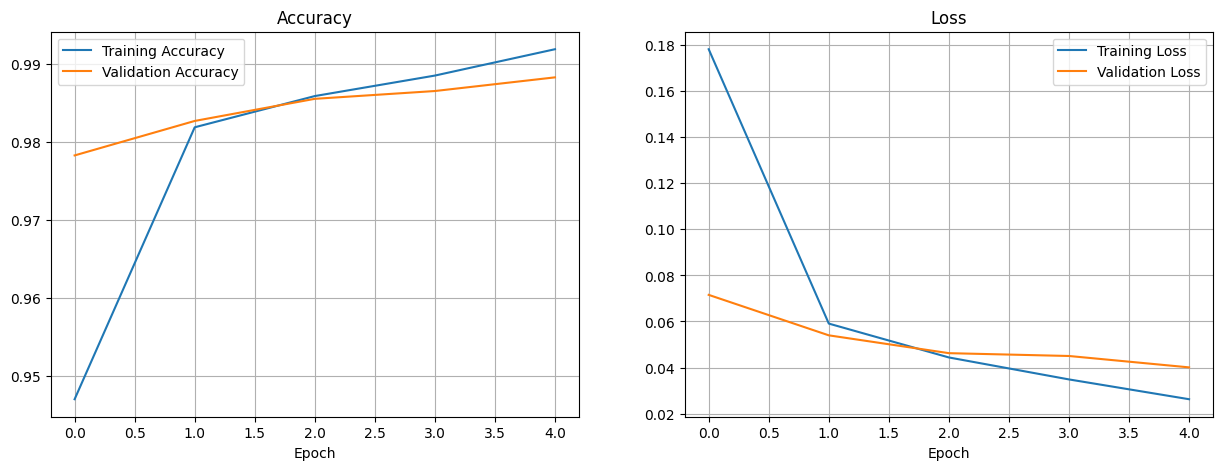

In [12]:
# 8. 학습 과정 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 정확도 그래프
ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend()
ax1.grid(True)

# 손실 그래프
ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Loss')
ax2.set_xlabel('Epoch')
ax2.legend()
ax2.grid(True)

plt.show()